# Compare models trained on mixed class data

This compares several different models trained on **mixed** *longliner*,
*trawler* and *purse seiner* data.

**NOTE: this was somewhat unstable. Running multiple times yielded significantly different results, 
  depending the data split.  I set seeds everywhere and now the output is stable. However, this tells 
  me that we want more data!**

In [1]:
from __future__ import print_function
%matplotlib inline
import numpy as np
from vessel_scoring import data
from vessel_scoring.evaluate_model import evaluate_model, train_model, compare_models
from IPython.core.display import display, HTML

In [2]:
x_tran, xtrain_tran, xcross_tran, xtest_tran = data.load_dataset_by_vessel('datasets/slow-transits.measures.npz',
                                                                     even_split=False)

Warning, insufficient items to sample, returning all


Warning, inufficient items to sample, returning 2084


In [3]:
set(x_tran['mmsi'])

{367512180.0, 367512510.0, 367534310.0, 367721000.0}

In [4]:
_, xtrain_trawl, xcross_trawl, xtest_trawl = data.load_dataset_by_vessel(
        'datasets/kristina_trawl.measures.npz')
_, xtrain_lline, xcross_lline, xtest_lline = data.load_dataset_by_vessel(
        'datasets/kristina_longliner.measures.npz')
_, xtrain_pseine, xcross_pseine, xtest_pseine = data.load_dataset_by_vessel(
        'datasets/kristina_ps.measures.npz')

In [5]:
def clone_subset(x, dtype):
    """copy only the portions of x in dtype to a new array"""
    new = np.zeros(x.shape, dtype=dtype)
    for name in dtype.names:
        new[name] = x[name]
    return new
        
# We need to make the fields in the tran data match that of the other 
# to concatenate
xtrain_tran = clone_subset(xtrain_tran, xtrain_lline.dtype)
xcross_tran = clone_subset(xcross_tran, xtrain_lline.dtype)
xtest_tran = clone_subset(xtest_tran, xtrain_lline.dtype)

In [6]:
TRANSIT_WEIGHT = 10

xtrain = np.concatenate([xtrain_trawl, xtrain_lline, xtrain_pseine] + 
                        [xtrain_tran] * TRANSIT_WEIGHT)
xcross = np.concatenate([xcross_trawl, xcross_lline, xcross_pseine] + 
                        [xcross_tran] * TRANSIT_WEIGHT)

train = np.concatenate([xtrain, xcross])

xtest = np.concatenate([xtest_trawl, xtest_lline, xtest_pseine, xtest_tran])

In [7]:
from vessel_scoring.legacy_heuristic_model import LegacyHeuristicModel
from vessel_scoring.random_forest_model import RandomForestModel
from vessel_scoring.logistic_model import LogisticModel
import imp, vessel_scoring.nnet_model; imp.reload(vessel_scoring.nnet_model)
# from vessel_scoring.nnet_model_proto import NNetModelProto
from vessel_scoring.nnet_model import NNetModel

untrained_models = [
    ('Logistic', LogisticModel(colspec=dict(windows=[43200]), order=6)),
    ('NN', NNetModel()),
    ('Random Forest (MW)', RandomForestModel(
            windows=[1800, 3600, 10800, 21600, 43200, 86400])),  
]

trained_models = [(name, train_model(mdl, train)) for (name, mdl) in untrained_models]

Step 0: loss = 0.66 (0.030 sec)
Step 100: loss = 0.23 (0.015 sec)
Step 200: loss = 0.21 (0.015 sec)
Step 300: loss = 0.21 (0.015 sec)
Step 400: loss = 0.20 (0.016 sec)
Step 500: loss = 0.34 (0.017 sec)
Step 600: loss = 0.17 (0.020 sec)
Epoch: 1
Training:  78569 / 86656 = 0.9067
Validation:  1511 / 1664 = 0.9081
Step 700: loss = 0.19 (0.017 sec)
Step 800: loss = 0.22 (0.017 sec)
Step 900: loss = 0.19 (0.018 sec)
Step 1000: loss = 0.21 (0.017 sec)
Step 1100: loss = 0.23 (0.018 sec)
Step 1200: loss = 0.23 (0.018 sec)
Step 1300: loss = 0.28 (0.018 sec)
Epoch: 2
Training:  78971 / 86656 = 0.9113
Validation:  1540 / 1664 = 0.9255
Step 1400: loss = 0.25 (0.018 sec)
Step 1500: loss = 0.19 (0.019 sec)
Step 1600: loss = 0.22 (0.021 sec)
Step 1700: loss = 0.36 (0.018 sec)
Step 1800: loss = 0.19 (0.018 sec)
Step 1900: loss = 0.12 (0.019 sec)
Step 2000: loss = 0.20 (0.018 sec)
Epoch: 3
Training:  79285 / 86656 = 0.9149
Validation:  1525 / 1664 = 0.9165
Step 2100: loss = 0.26 (0.019 sec)
Step 2200: 

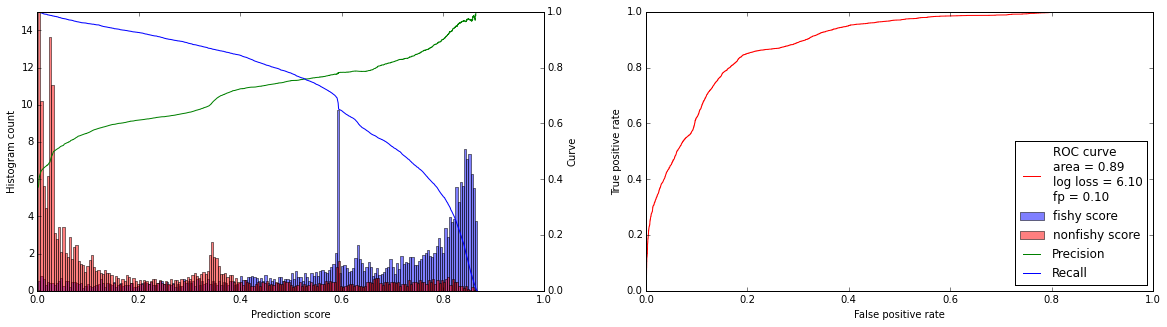

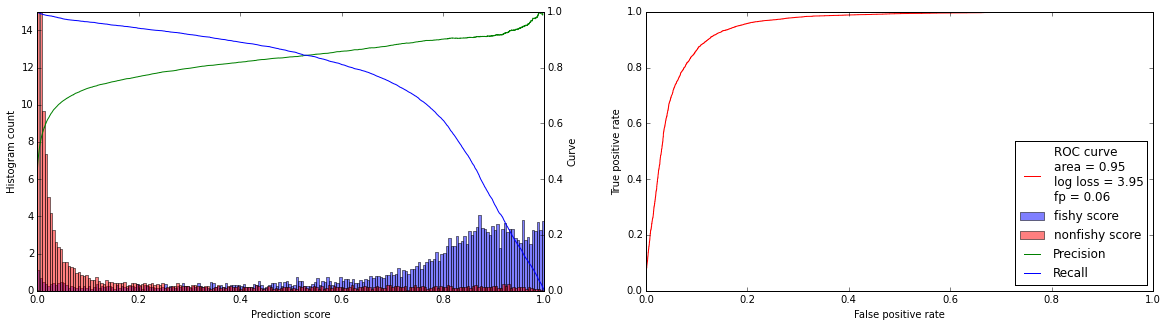

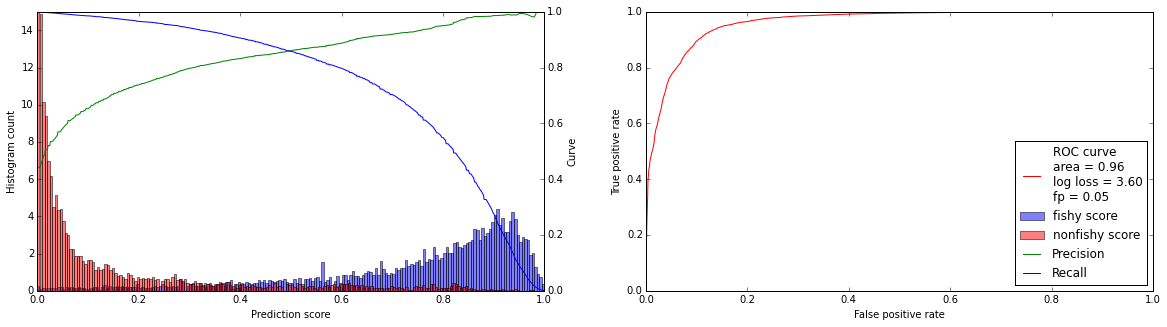

In [8]:

display(HTML("<h1>Overall Comparison</h1>"))
for name, mdl in trained_models:
    evaluate_model(mdl, xtest, name=name)


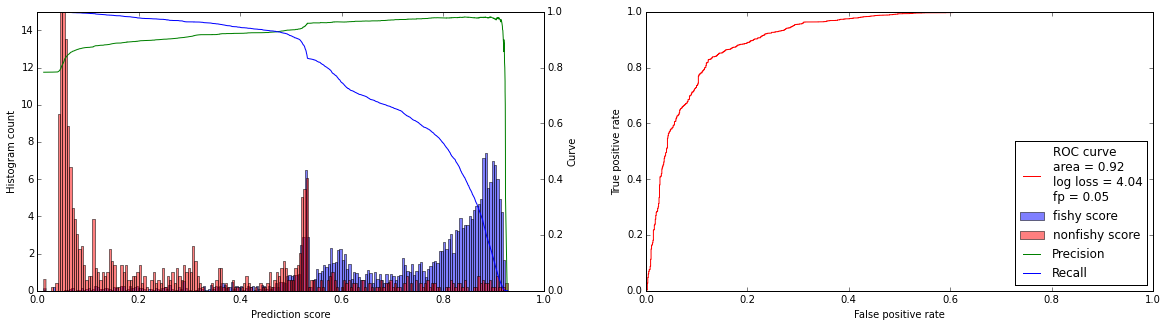

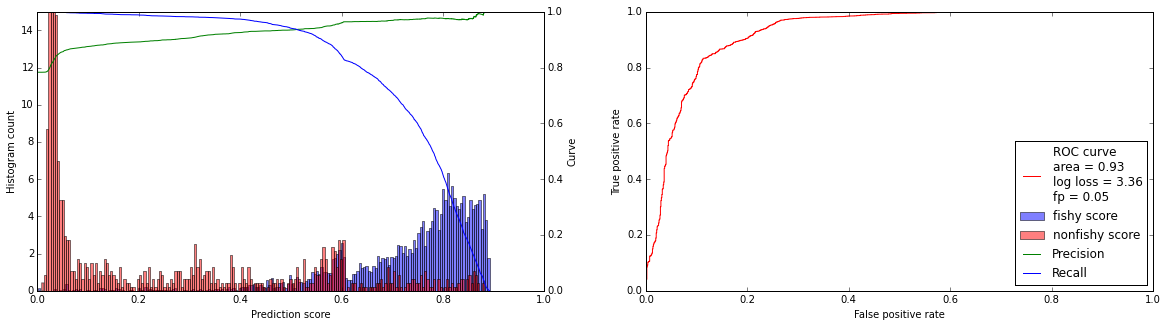

Step 0: loss = 0.78 (0.028 sec)
Epoch: 1
Training:  8081 / 9728 = 0.8307
Validation:  110 / 128 = 0.8594
Step 100: loss = 0.48 (0.015 sec)
Epoch: 2
Training:  8095 / 9728 = 0.8321
Validation:  112 / 128 = 0.8750
Step 200: loss = 0.51 (0.019 sec)
Epoch: 3
Training:  8129 / 9728 = 0.8356
Validation:  108 / 128 = 0.8438
Step 300: loss = 0.26 (0.020 sec)
Epoch: 4
Training:  8249 / 9728 = 0.8480
Validation:  108 / 128 = 0.8438
Epoch: 5
Training:  8219 / 9728 = 0.8449
Validation:  110 / 128 = 0.8594
Step 400: loss = 0.26 (0.019 sec)
Epoch: 6
Training:  8183 / 9728 = 0.8412
Validation:  113 / 128 = 0.8828
Step 500: loss = 0.39 (0.019 sec)
Epoch: 7
Training:  8273 / 9728 = 0.8504
Validation:  113 / 128 = 0.8828
Step 600: loss = 0.33 (0.020 sec)
Epoch: 8
Training:  8275 / 9728 = 0.8506
Validation:  111 / 128 = 0.8672
Epoch: 9
Training:  8316 / 9728 = 0.8549
Validation:  112 / 128 = 0.8750
Step 700: loss = 0.42 (0.019 sec)
Epoch: 10
Training:  8307 / 9728 = 0.8539
Validation:  109 / 128 = 0.8516

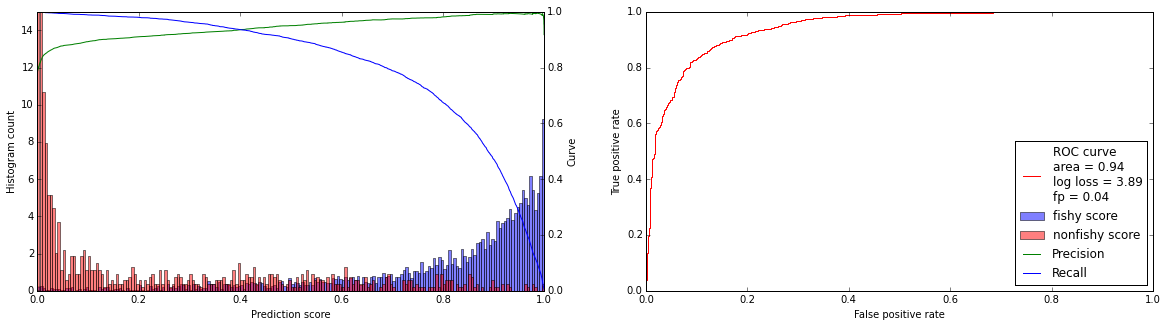

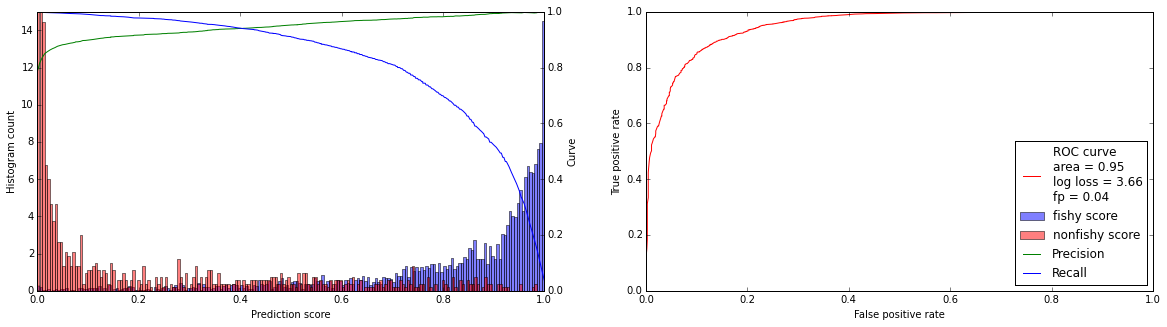

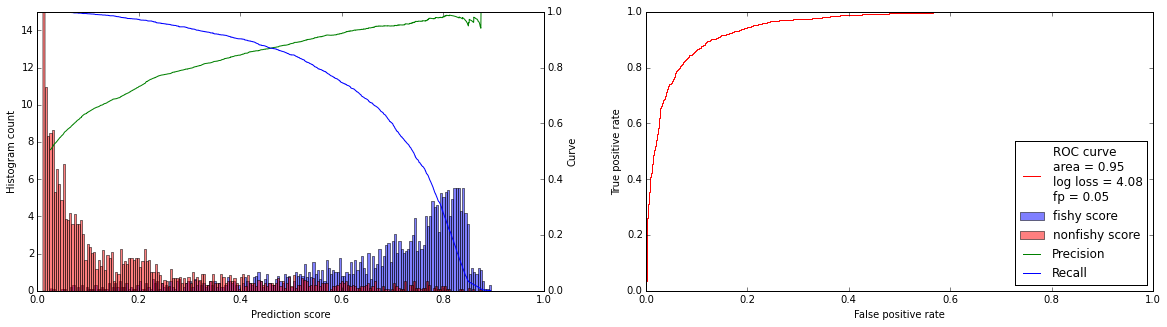

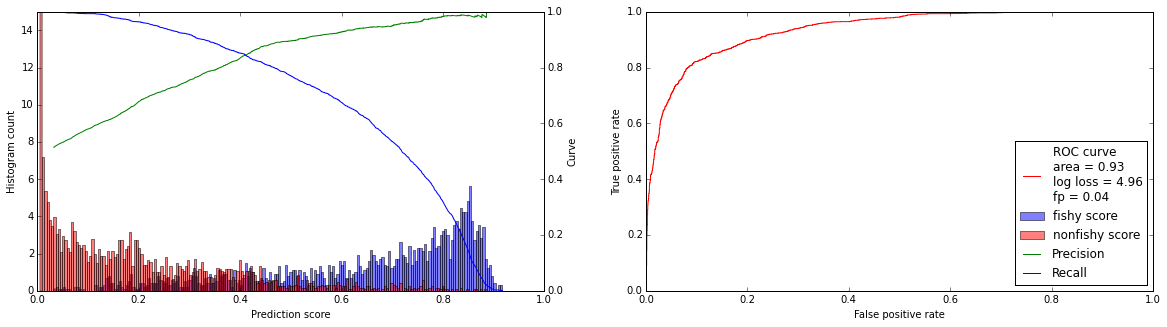

Step 0: loss = 0.72 (0.026 sec)
Epoch: 1
Training:  7912 / 9728 = 0.8133
Validation:  107 / 128 = 0.8359
Step 100: loss = 0.37 (0.016 sec)
Epoch: 2
Training:  7502 / 9728 = 0.7712
Validation:  108 / 128 = 0.8438
Step 200: loss = 0.42 (0.020 sec)
Epoch: 3
Training:  8092 / 9728 = 0.8318
Validation:  108 / 128 = 0.8438
Step 300: loss = 0.37 (0.021 sec)
Epoch: 4
Training:  8115 / 9728 = 0.8342
Validation:  110 / 128 = 0.8594
Epoch: 5
Training:  8118 / 9728 = 0.8345
Validation:  112 / 128 = 0.8750
Step 400: loss = 0.35 (0.021 sec)
Epoch: 6
Training:  8151 / 9728 = 0.8379
Validation:  111 / 128 = 0.8672
Step 500: loss = 0.41 (0.022 sec)
Epoch: 7
Training:  8175 / 9728 = 0.8404
Validation:  106 / 128 = 0.8281
Step 600: loss = 0.40 (0.020 sec)
Epoch: 8
Training:  8193 / 9728 = 0.8422
Validation:  106 / 128 = 0.8281
Epoch: 9
Training:  8217 / 9728 = 0.8447
Validation:  107 / 128 = 0.8359
Step 700: loss = 0.40 (0.020 sec)
Epoch: 10
Training:  8227 / 9728 = 0.8457
Validation:  106 / 128 = 0.8281

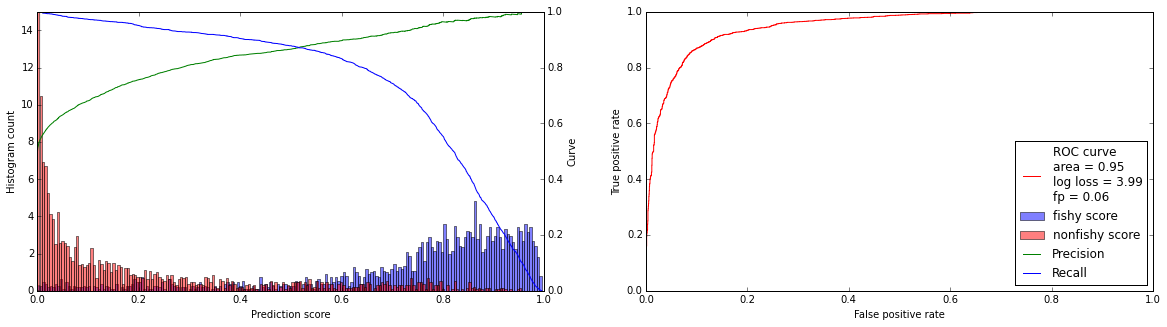

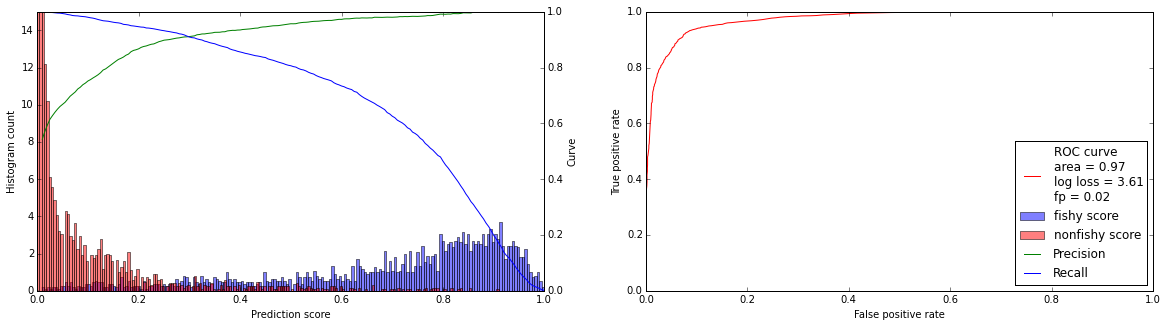

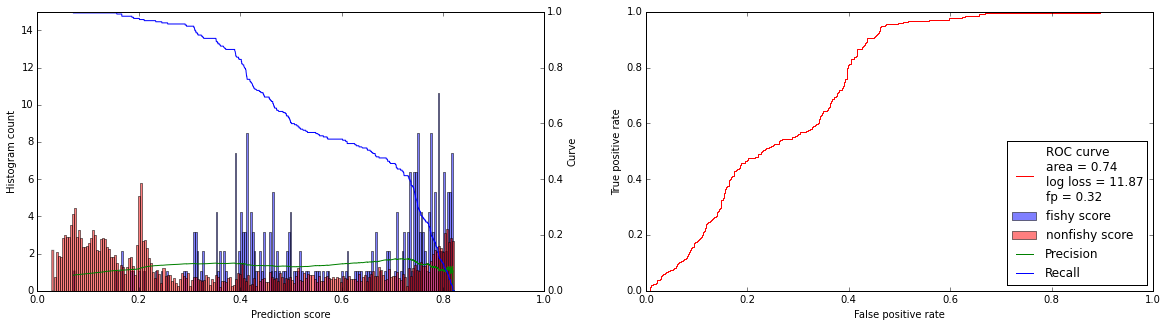

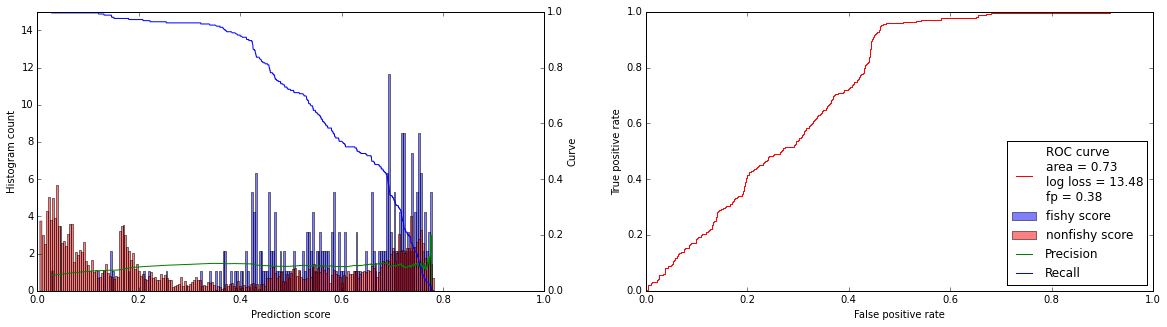

Step 0: loss = 0.67 (0.028 sec)
Epoch: 1
Training:  8089 / 9728 = 0.8315
Validation:  114 / 128 = 0.8906
Step 100: loss = 0.41 (0.019 sec)
Epoch: 2
Training:  8335 / 9728 = 0.8568
Validation:  109 / 128 = 0.8516
Step 200: loss = 0.33 (0.025 sec)
Epoch: 3
Training:  8368 / 9728 = 0.8602
Validation:  115 / 128 = 0.8984
Step 300: loss = 0.33 (0.027 sec)
Epoch: 4
Training:  8419 / 9728 = 0.8654
Validation:  111 / 128 = 0.8672
Epoch: 5
Training:  8572 / 9728 = 0.8812
Validation:  114 / 128 = 0.8906
Step 400: loss = 0.27 (0.023 sec)
Epoch: 6
Training:  8450 / 9728 = 0.8686
Validation:  117 / 128 = 0.9141
Step 500: loss = 0.35 (0.021 sec)
Epoch: 7
Training:  8582 / 9728 = 0.8822
Validation:  116 / 128 = 0.9062
Step 600: loss = 0.33 (0.021 sec)
Epoch: 8
Training:  8571 / 9728 = 0.8811
Validation:  111 / 128 = 0.8672
Epoch: 9
Training:  8637 / 9728 = 0.8878
Validation:  115 / 128 = 0.8984
Step 700: loss = 0.22 (0.021 sec)
Epoch: 10
Training:  8607 / 9728 = 0.8848
Validation:  111 / 128 = 0.8672

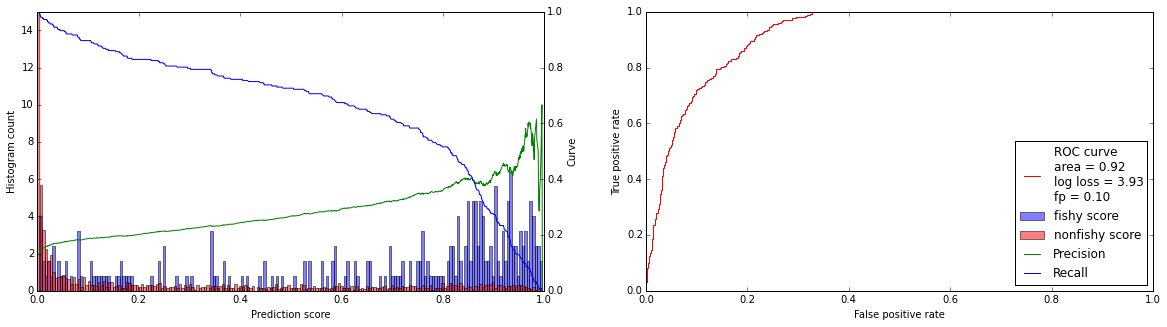

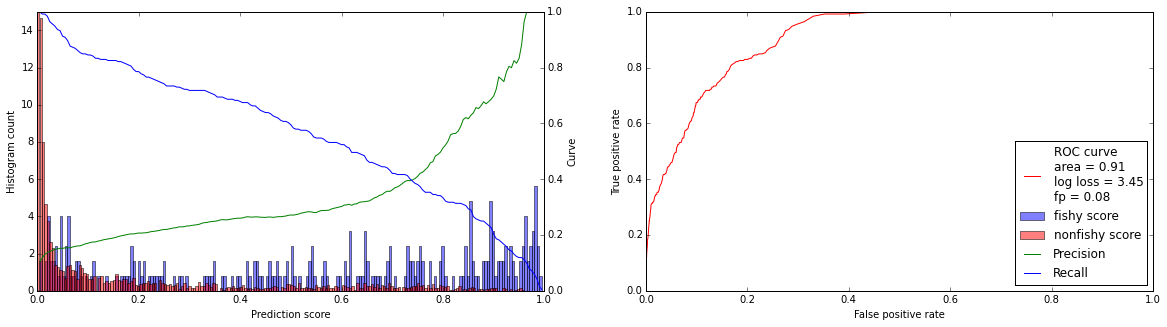

In [9]:

import imp, vessel_scoring.nnet_model; imp.reload(vessel_scoring.nnet_model)

for vessel_class, xtrain_class, xtest_class in  [("longliner", xtrain_lline, xtest_lline), 
                                                   ("trawler", xtrain_trawl, xtest_trawl), 
                                                   ("purse seine", xtrain_pseine, xtest_pseine)]:
    untrained_models = [
        ('Logistic', LogisticModel(colspec=dict(windows=[43200]), order=6)),
        ('Logistic opt MSE', LogisticModel(colspec=dict(windows=[43200]), order=4, cross=3)),
    #     ('Logistic (MW)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6)),
    #     ('Logistic (MW/cross3)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6, cross=2)),
    #     ('Random Forest', RandomForestModel(windows=[43200])),
        ('NN', NNetModel()),
#         ('NN Proto', NNetModelProto()),
        ('Random Forest (MW)', RandomForestModel(windows=[1800, 3600, 10800, 21600, 43200, 86400])),
    #     ('Legacy', LegacyHeuristicModel(window=3600)),
    #     ("Legacy (3 Hour)", LegacyHeuristicModel(window=10800)),
    #     ("Legacy (12 Hour)", LegacyHeuristicModel(window=43200)),
    #     ("Legacy (24 Hour)", LegacyHeuristicModel(window=86400)),  
    ]
    display(HTML("<h1>Comparison for {0}</h1>".format(vessel_class)))
    for name, mdl in untrained_models:
        mdl = train_model(mdl, xtrain_class)
        evaluate_model(mdl, xtest_class, name=name)
#     display(HTML("<h1>Comparison for {0}</h1>".format(vessel_class)))
#     compare_models(trained_models, xtest_class)

# How does this model do on the slow transit tracks?

In [10]:
for name, mdl in trained_models:
    p = mdl.predict_proba(xtest_tran)[:,1]
    print(name, p.mean(), (p > 0.5).mean())

Logistic 0.101812865495 0.0734838424081
NN 0.0624484 0.0708277999115
Random Forest (MW) 0.0829459938026 0.074369189907


## What about the new transit tracks?

In [11]:
from vessel_scoring import data
x_tran2 = np.load('datasets/new_transits.measures.npz')['x']

# We are somehow getting an extra, 0 MMSI. Why?
# Results are totally bogus
x_tran2 = x_tran2[x_tran2['mmsi'] != 0]
mask = np.ones([len(x_tran2)], dtype=bool)

for name in x_tran2.dtype.names:
    if name.startswith('measure_'):
        submask = np.isnan(x_tran2[name])
        mask &= ~submask
x_tran2 = x_tran2[mask]

print("Transit tracks for", sorted(set(x_tran2['mmsi'])))
assert not (set(x_tran2['mmsi']) & set(x_tran['mmsi'])), "overlap between old and new transit sets"
print
for name, mdl in trained_models:
    p = mdl.predict_proba(x_tran2)[:,1]
    print(name, p.mean(), (p > 0.5).mean())

Transit tracks for [367512170.0, 412420562.0, 412420979.0, 412420992.0]
Logistic 0.0520752618238 0.0255897898672
NN 0.020861 0.0137939925229
Random Forest (MW) 0.0530588500709 0.0250096686863


## Where are the false positives?

The important thing is that the false positives are not evenly spaced out, so they shouldn't
show up as track like.

FP rate for MMSI 367512170 is: 0.022430668841761828
FP rate for MMSI 412420562 is: 0.058577405857740586
FP rate for MMSI 412420979 is: 0.020653398422831395
FP rate for MMSI 412420992 is: 0.0037251655629139072


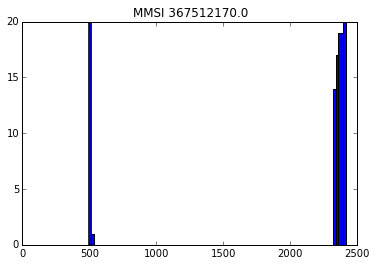

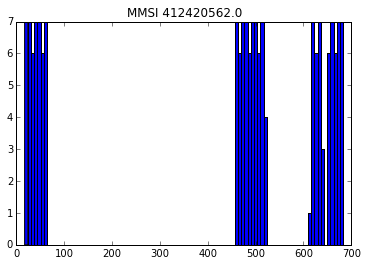

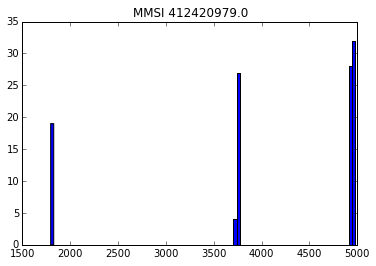

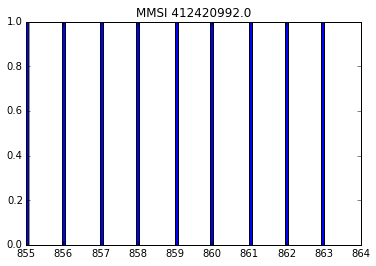

In [12]:
import matplotlib.pyplot as plt
mmsi = sorted(set(x_tran2['mmsi']))

name, mdl = trained_models[0]

for m in mmsi:
    subset = x_tran2[x_tran2['mmsi'] == m]
    n = len(subset)
    locs = np.arange(n)[mdl.predict_proba(subset)[:,1] > 0.5]
    print("FP rate for MMSI", int(m), "is:", len(locs) / float(n))
    if not len(locs):
        continue
    plt.figure()
    plt.title("MMSI {0}".format(m))
    plt.hist(locs, bins=100)